In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('diabetes_data_upload.csv')

In [ ]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
df.tail()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [ ]:
df.sample(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
113,79,Male,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,No,No,Positive
294,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Negative
289,40,Male,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Yes,Negative
112,68,Female,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Positive
387,36,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative
167,41,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Positive
329,56,Male,No,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,No,Negative
21,54,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,Positive
506,61,Male,No,No,No,Yes,No,Yes,No,Yes,No,Yes,No,No,Yes,No,Negative
463,72,Male,Yes,No,No,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Negative


In [ ]:
original_features_count = df.columns

In [ ]:
row_count = df.shape[0]

In [ ]:
print('Original Features count:', len(original_features_count))
print('List of the original features: ', original_features_count)
print('Number of rows: ', row_count)

Original Features count: 17
List of the original features:  Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')
Number of rows:  520


In [ ]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

# **Normalization**

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

for column in df.columns[1:]:
    df[column]= label_encoder.fit_transform(df[column])

In [ ]:
df.head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
5,55,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1
6,57,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1
7,66,1,1,1,1,1,0,0,1,1,1,0,1,1,0,0,1
8,67,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1
9,70,1,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1


In [ ]:
ages = df['Age']

In [ ]:
df['Age'] = (ages - np.min(ages))/(np.max(ages)-np.min(ages))
df['Age'].head(12)

0     0.324324
1     0.567568
2     0.337838
3     0.391892
4     0.594595
5     0.527027
6     0.554054
7     0.675676
8     0.689189
9     0.729730
10    0.378378
11    0.297297
Name: Age, dtype: float64

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
X.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

# **Data Splitting**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=0)

# **Data Modeling**

# **Bagging-SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
svm=SVC(kernel='rbf',probability=True)

bagging_svm = BaggingClassifier(estimator=svm, n_estimators=100, random_state=42)
bagging_svm.fit(X_train, y_train)

sv_train = bagging_svm.predict(X_train)
sv_pred = bagging_svm.predict(X_test)

trainsvm_acc = accuracy_score(sv_train, y_train)
svm_acc = accuracy_score(sv_pred, y_test)
print('Akurasi pada data latih : ', trainsvm_acc)
print('Akurasi pada data uji : ', svm_acc)

Akurasi pada data latih :  0.980246913580247
Akurasi pada data uji :  0.991304347826087


In [ ]:
print(classification_report(sv_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       1.00      0.99      0.99        69

    accuracy                           0.99       115
   macro avg       0.99      0.99      0.99       115
weighted avg       0.99      0.99      0.99       115



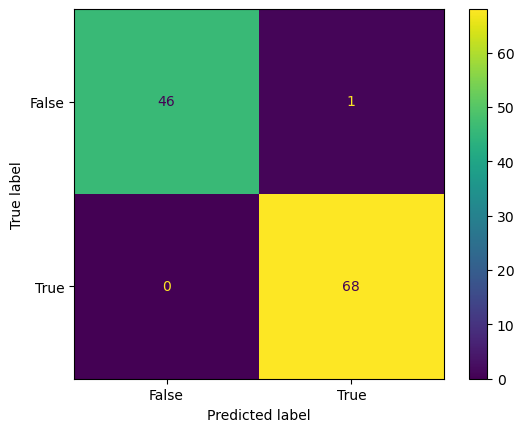

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, sv_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = [False, True])
cm_display.plot()
plt.show()

# **Extra Tree**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
extra_trees = ExtraTreesClassifier(n_estimators=1000, random_state=42)
extra_trees.fit(X_train, y_train)
ext_train = extra_trees.predict(X_train)
ext_pred = extra_trees.predict(X_test)

trainet_acc = accuracy_score(ext_train, y_train)
et_acc = accuracy_score(ext_pred, y_test)
print('Akurasi pada data latih : ', trainet_acc)
print('Akurasi pada data uji : ', et_acc)

Akurasi pada data latih :  1.0
Akurasi pada data uji :  0.991304347826087


In [ ]:
print(classification_report(ext_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       1.00      0.99      0.99        69

    accuracy                           0.99       115
   macro avg       0.99      0.99      0.99       115
weighted avg       0.99      0.99      0.99       115



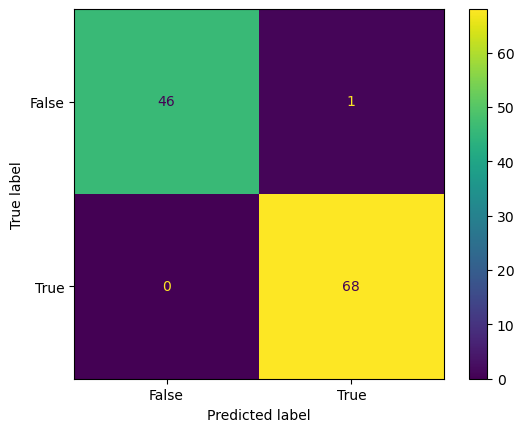

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, ext_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = [False, True])
cm_display.plot()
plt.show()

# **Ensemble KNN (Hard Voting Classifier)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
knn1 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn2 = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn3 = KNeighborsClassifier(n_neighbors=7, metric='chebyshev')

ensemble = VotingClassifier(estimators=[('knn1', knn1), ('knn2', knn2), ('knn3', knn3)], voting='hard')
ensemble.fit(X_train, y_train)

knn_train = ensemble.predict(X_train)
knn_pred = ensemble.predict(X_test)

accuracy_trainknn = accuracy_score(knn_train, y_train)
accuracy_knn = accuracy_score(knn_pred, y_test)
print('Akurasi pada data latih : ', accuracy_trainknn)
print('Akurasi pada data uji : ', accuracy_knn)

Akurasi pada data latih :  0.9555555555555556
Akurasi pada data uji :  0.9652173913043478


In [ ]:
print(classification_report(knn_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        49
           1       0.96      0.98      0.97        66

    accuracy                           0.97       115
   macro avg       0.97      0.96      0.96       115
weighted avg       0.97      0.97      0.97       115



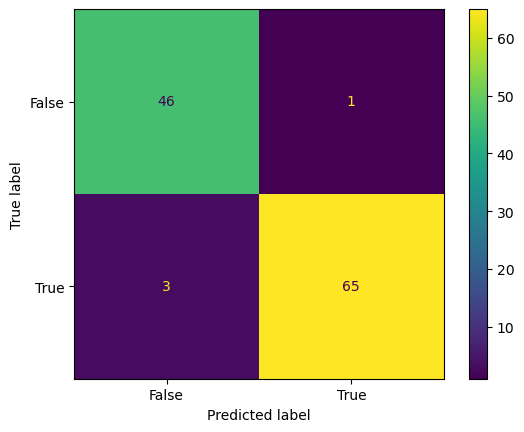

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, knn_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = [False, True])
cm_display.plot()
plt.show()

# **Stacking-MLP**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier

# Define the first MLP model
mlp1 = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu',
                     alpha=0.0001, batch_size='auto', learning_rate='constant',
                     learning_rate_init=0.001, max_iter=200, random_state=42)

# Define the second MLP model
mlp2 = MLPClassifier(hidden_layer_sizes=(50, 50), activation='relu',
                     alpha=0.0001, batch_size='auto', learning_rate='constant',
                     learning_rate_init=0.001, max_iter=200, random_state=42)

# Define the final meta-classifier (MLP) that combines the predictions of individual models
meta_classifier = MLPClassifier(hidden_layer_sizes=(50,), activation='relu',
                               alpha=0.0001, batch_size='auto', learning_rate='constant',
                               learning_rate_init=0.001, max_iter=200, random_state=42)

stacking_classifier = StackingClassifier(estimators=[('mlp1', mlp1), ('mlp2', mlp2)],
                                        final_estimator=meta_classifier)

stacking_classifier.fit(X_train, y_train)

mlp_train = stacking_classifier.predict(X_train)
mlp_pred = stacking_classifier.predict(X_test)

accuracy_trainmlp = accuracy_score(mlp_train, y_train)
accuracy_mlp = accuracy_score(mlp_pred, y_test)
print('Akurasi pada data latih : ', accuracy_trainmlp)
print('Akurasi pada data uji : ', accuracy_mlp)

Akurasi pada data latih :  0.9901234567901235
Akurasi pada data uji :  0.991304347826087


In [ ]:
print(classification_report(mlp_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       1.00      0.99      0.99        69

    accuracy                           0.99       115
   macro avg       0.99      0.99      0.99       115
weighted avg       0.99      0.99      0.99       115



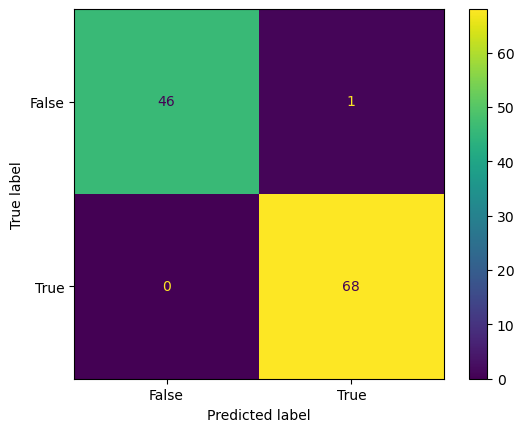

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, mlp_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = [False, True])
cm_display.plot()
plt.show()

# **AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Membuat objek DecisionTreeClassifier sebagai base learner
base_classifier = DecisionTreeClassifier(max_depth=2)

# Membuat objek AdaBoostClassifier dengan Decision Tree sebagai base learner
adaboost_classifier = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=700, random_state=42)

# Melatih model menggunakan data latih
adaboost_classifier.fit(X_train, y_train)

# Melakukan prediksi pada data latih dan data uji
train_predictions = adaboost_classifier.predict(X_train)
test_predictions = adaboost_classifier.predict(X_test)

# Menghitung akurasi prediksi
trainada_accuracy = accuracy_score(y_train, train_predictions)
ada_accuracy = accuracy_score(y_test, test_predictions)

print("Akurasi pada data latih:", trainada_accuracy)
print("Akurasi pada data uji:", ada_accuracy)

Akurasi pada data latih: 1.0
Akurasi pada data uji: 0.9826086956521739


In [ ]:
print(classification_report(test_predictions, y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        47
           1       0.99      0.99      0.99        68

    accuracy                           0.98       115
   macro avg       0.98      0.98      0.98       115
weighted avg       0.98      0.98      0.98       115



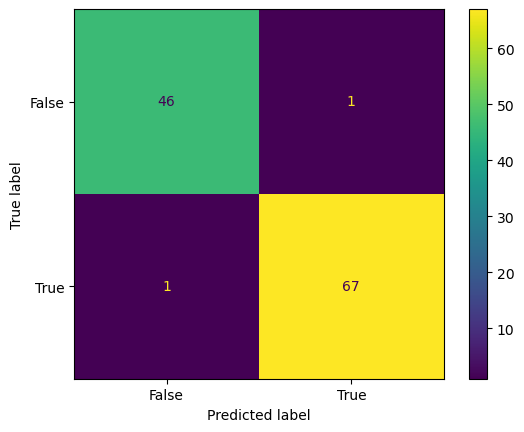

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test,test_predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                            display_labels = [False, True])
cm_display.plot()
plt.show()

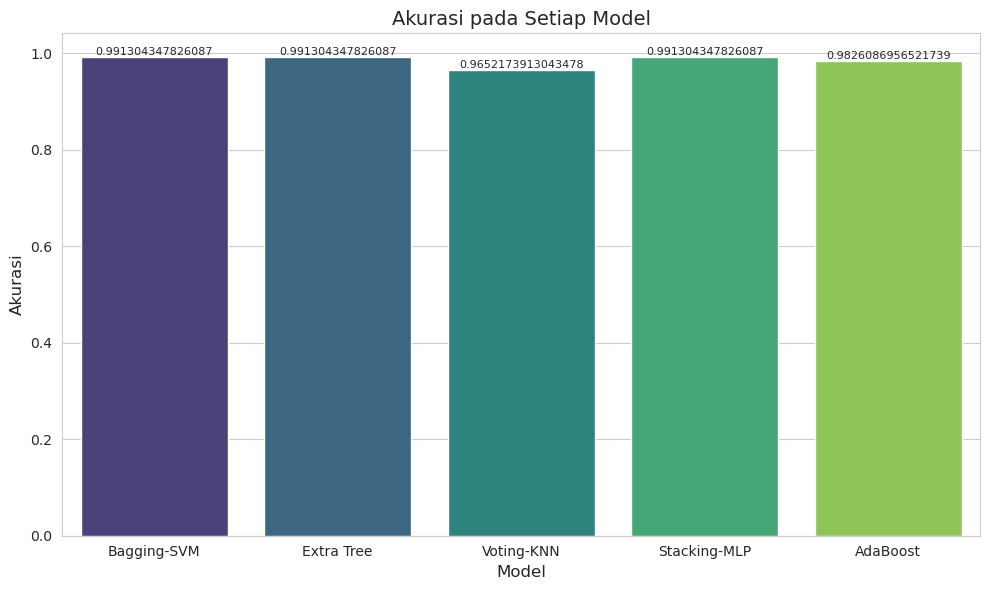

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List model
models = ['Bagging-SVM', 'Extra Tree', 'Voting-KNN', 'Stacking-MLP', 'AdaBoost']

# List akurasi
accuracies = [svm_acc, et_acc, accuracy_knn, accuracy_mlp, ada_accuracy]

# Mengatur gaya plot
sns.set_style("whitegrid")

# Membuat plot
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette="viridis")

# Menambahkan label pada batang
for i in range(len(models)):
    plt.text(i, accuracies[i], str(accuracies[i]), ha='center', va='bottom', fontsize=8)

# Menambahkan judul dan label sumbu
plt.title('Akurasi pada Setiap Model', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Akurasi', fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()
